In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math as m
import mahotas as mt
%matplotlib notebook

# Basic Pre-Processing

### Importing

In [3]:
path = "C:\\Users\\suhas\\Documents\\Mini Project\\Leaves\\1085.jpg"

<IPython.core.display.Javascript object>


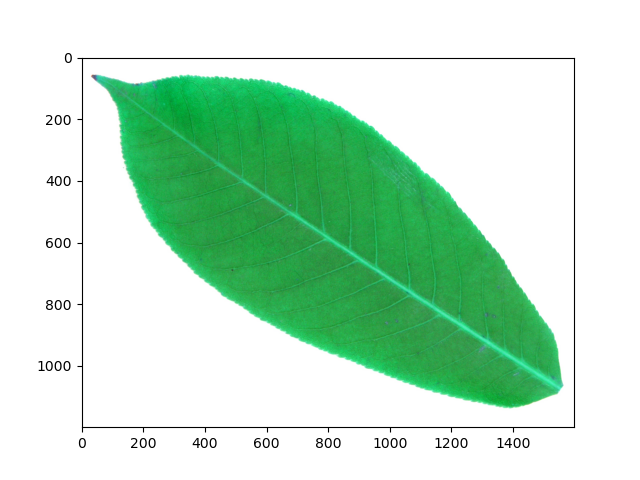

In [4]:
img = cv2.imread(path)
plt.imshow(img)

### Grayscale

<IPython.core.display.Javascript object>


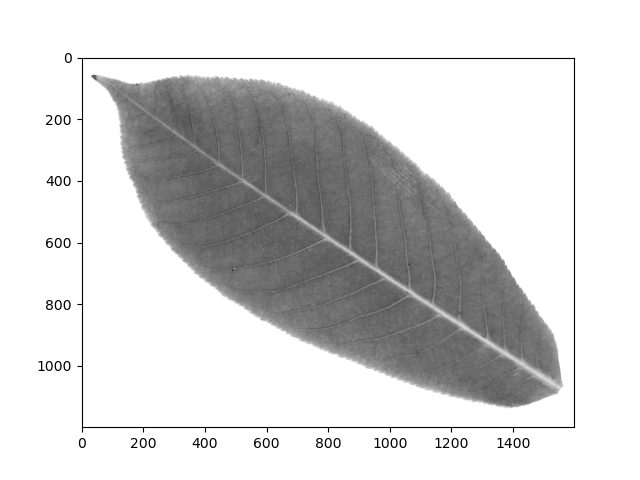

In [5]:
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(imgGray, cmap='Greys_r')

### Applying Blur

<IPython.core.display.Javascript object>


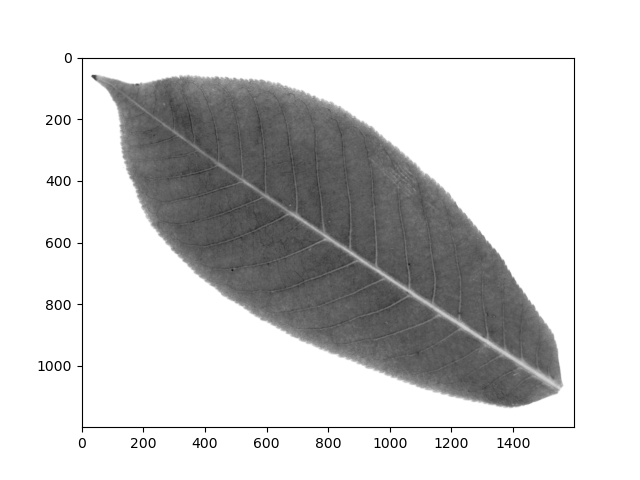

In [6]:
imgBlur = cv2.GaussianBlur(imgGray, (3, 3), 0)
plt.figure()
plt.imshow(imgBlur, cmap='Greys_r')

### Converting to Binary

In [7]:
thresh, imgBW = cv2.threshold(imgBlur, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

<IPython.core.display.Javascript object>


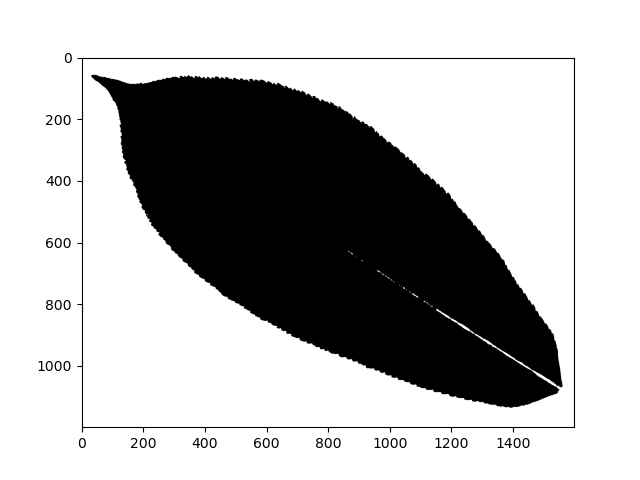

In [8]:
plt.figure()
plt.imshow(imgBW, cmap='Greys_r')

### Image Inversion

<IPython.core.display.Javascript object>


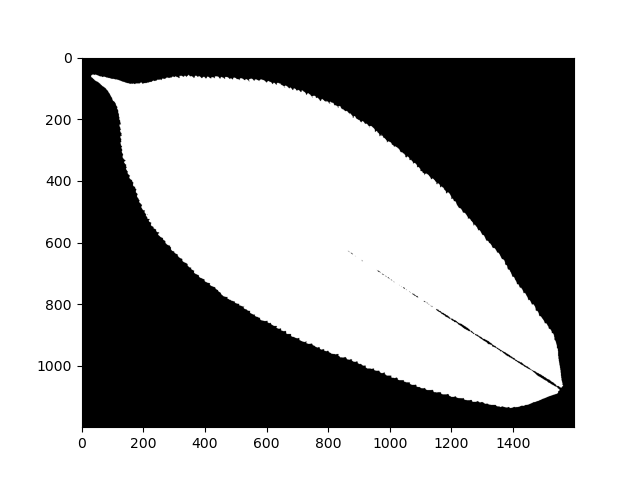

In [9]:
imgInv = cv2.bitwise_not(imgBW)
plt.figure()
plt.imshow(imgInv, cmap='Greys_r')

### Filling Holes


In [10]:
kernel = np.ones((50, 50))
imgClosed = cv2.morphologyEx(imgInv, cv2.MORPH_CLOSE, kernel)

<IPython.core.display.Javascript object>


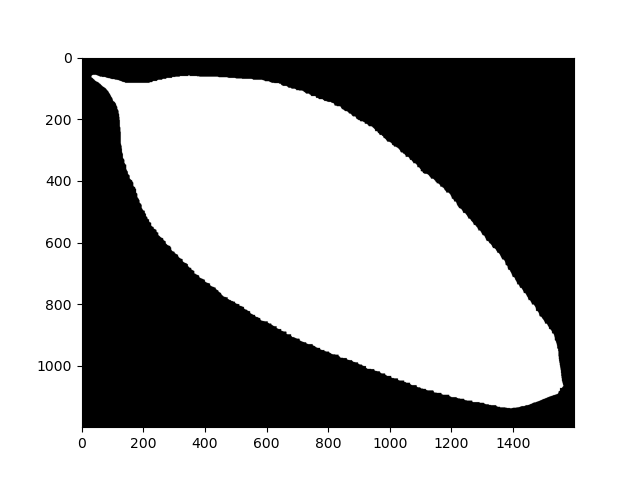

In [11]:
plt.figure()
plt.imshow(imgClosed, cmap='Greys_r')

### Countour Detection

In [12]:
_, contours, _ = cv2.findContours(imgClosed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

<IPython.core.display.Javascript object>


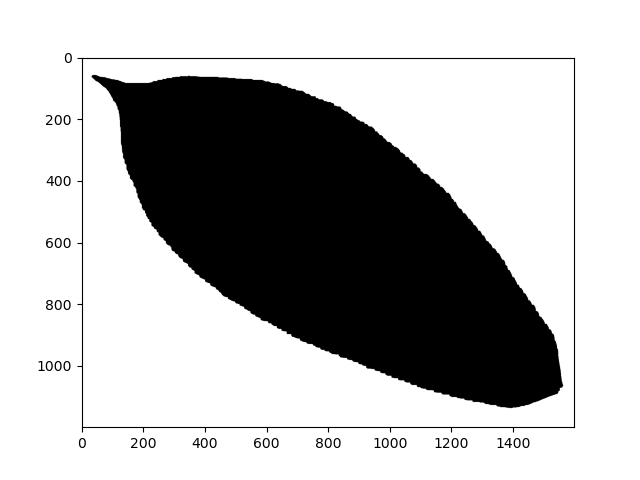

In [13]:
imgCont = cv2.bitwise_not(imgClosed)
plt.figure()
plt.imshow(imgCont, cmap='Greys_r')

In [14]:
len(contours)

1

In [15]:
cnt = contours[0]
len(cnt)

4063

### Drawing Contours to Check

In [16]:
imgTest = cv2.drawContours(imgGray, contours, -1, (0, 255, 0), 3)

<IPython.core.display.Javascript object>


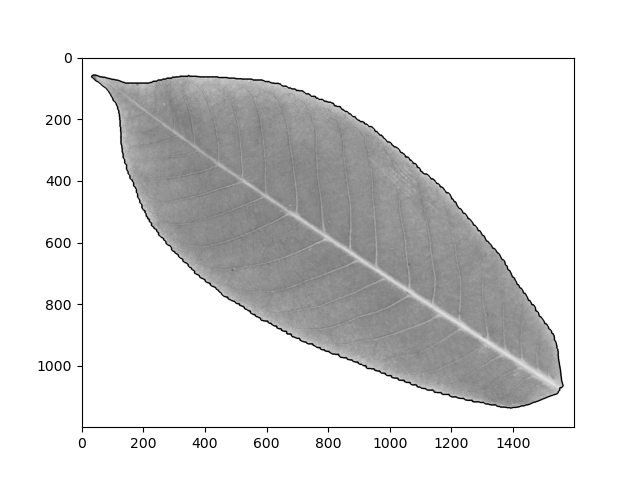

In [17]:
plt.figure()
plt.imshow(imgTest, cmap='Greys_r')

 # Feature Extraction

 ## Colour-Based Features

### Red Channel

In [21]:
red = img.copy()

In [22]:
# Setting Blue and Green Channels to 0
red[:, :, 0] = 0
red[:, :, 1] = 0

In [23]:
cv2.imshow('Red', red)
cv2.waitKey(0)

-1

In [24]:
red_mean = np.mean(red[:, :, 2])

In [25]:
red_mean

172.21165729166665

In [26]:
red_var = np.std(red[:, :, 2])

In [27]:
red_var

88.76363000467902

### Blue Channel


In [28]:
blue = img.copy()

In [29]:
# Setting Green and Red Channels to 0
blue[:, :, 1] = 0
blue[:, :, 2] = 0

In [30]:
cv2.imshow('Blue', blue)
cv2.waitKey(0)

-1

In [31]:
blue_mean = np.mean(blue[:, :, 0])

In [32]:
blue_mean

153.44620572916668

In [33]:
blue_var = np.std(blue[:, :, 0])

In [34]:
blue_var

107.93300267087649

### Green Channel

In [35]:
green = img.copy()

In [36]:
# Setting Blue and Red Channels to 0
green[:, :, 0] = 0
green[:, :, 2] = 0

In [37]:
cv2.imshow('Green', green)
cv2.waitKey(0)

-1

In [38]:
green_mean = np.mean(green[:, :, 1])

In [39]:
green_mean

214.72972708333333

In [40]:
green_var = np.std(green[:, :, 1])

In [41]:
green_var

44.26634352662508

 ## Shape-Based Features

### Area

In [45]:
area = cv2.contourArea(cnt)

In [46]:
area

896285.5

### Perimeter

In [47]:
per = cv2.arcLength(cnt, True)

In [48]:
per

4562.955740571022

### Diameter

In [53]:
dia = 0
for i in range(len(cnt)):
    for j in range(len(cnt)):
        if (i != j):
            temp = np.linalg.norm(cnt[i] - cnt[j])
            if (temp > dia):
                dia = temp

                
dia

1831.10240019503

### Finding Bounding Box

<IPython.core.display.Javascript object>


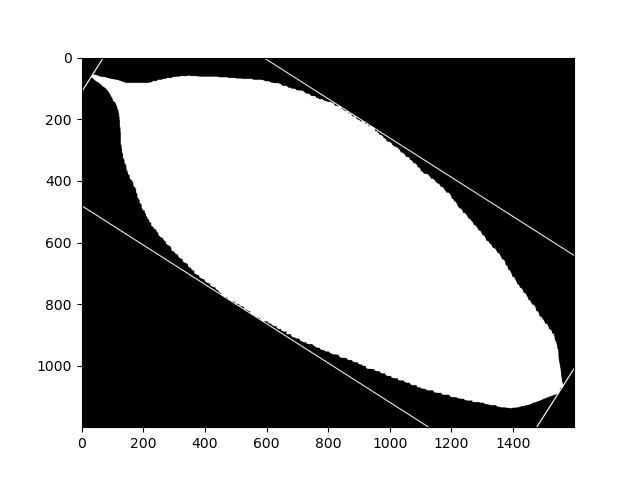

In [36]:
rect = cv2.minAreaRect(cnt)
points = cv2.boxPoints(rect)
points = np.int0(points)
contours_im = cv2.drawContours(imgClosed, [points], 0, (255, 255, 255), 2)
plt.figure()
plt.imshow(contours_im, cmap='Greys_r')

In [37]:
(x, y), (w, h), angle = rect

In [40]:
(w, h)

(722.3208618164062, 1830.915771484375)

## Morphological Features

### Aspect Ratio

Ratio of Physiological Length to Width

In [42]:
ar = float(h) / w
ar

2.5347679518492745

### Form Factor
Difference between a leaf and a circle

In [50]:
ff = (4 * m.pi * area) / (m.pow(per, 2))
ff

0.5409582170497372

### Rectangularity
How similar a leaf is to a rectangle

In [51]:
rectangularity = (h * w) / area
rectangularity

1.4755439622439994

### Narrow Factor
The narrowness of the leaf

In [54]:
nf = dia / h
nf

1.0001019318930786

### Perimeter Ratio of Diameter

Ratio of perimeter of leaf to diameter

In [55]:
pr = per / dia
pr

2.4919172953325948

### Perimeter Ratio of Physiological Length and Physiological Width

Ratio of perimeter of leaf to sum of its physiological length and width

In [57]:
prlw = per / (w + h)
prlw

1.7871260662087987

## Texture Based Features

In [67]:
textures = mt.features.haralick(imgGray)

In [68]:
textures  = textures.mean(axis=0)
textures

array([ 2.69952794e-01,  1.62244893e+02,  9.82152379e-01,  4.54522681e+03,
        6.31175753e-01,  3.85836660e+02,  1.80186624e+04,  4.20542953e+00,
        5.85344815e+00,  1.32072553e-03,  2.53517308e+00, -4.33835013e-01,
        9.80123755e-01])

In [69]:
textures.shape

(13,)

In [ ]:
contrast = textures[1]
correlation = textures[2]
entropy = textures[8]
